<a href="https://colab.research.google.com/github/Michiel004/Chess-pieces-detection-using-YOLOV3/blob/master/chess_pieces_detection_YOLOV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
%cd  "/content/gdrive/My Drive/darknet"
!ls
!make
!chmod +x ./darknet

/content/gdrive/My Drive/darknetChessNfpa
 1.names			   libdarknet.so
 1.png				   LICENSE
 1-yolov3-tiny.weights		   LICENSE.fuck
 2.jpg				   LICENSE.gen
 2.png				   LICENSE.gpl
 3.png				   LICENSE.meta
 4.png				   LICENSE.mit
'back teks'			   LICENSE.v1
 backup				   log
 backupv2			   Makefile
 backupv3			   obj
 bad.list			   predictions.jpg
 cfg				   process.py
 chess.names			   python
 chess-yolov3-tiny_10000.weights   README.md
 chess-yolov3-tiny_900.weights	   results
 chess-yolov3-tinyv2.weights	   scripts
 chess-yolov3-tiny.weights	   src
 classes.txt			   testChess.txt
 darknet			   test.txt
 darknet53.conv.74		   trainChess.txt
 data				   train.txt
 examples			   yolov3-tiny.weights
 include			   yolov3.weights
 libdarknet.a


In [0]:
 !./darknet detector train cfg/chess.data cfg/chess-yolov3.cfg darknet53.conv.74

In [0]:
#Resume training from a previous checkpoint.
#!./darknet detector train cfg/chess.data cfg/chess-yolov3.cfg backup/chess-yolov3.backup -map

In [0]:
#Save the log file of the training.
#!./darknet detector train cfg/chess.data cfg/chess-yolov3.cfg backup/chess-yolov3.backup >> log/ChessLog.log

In [0]:
!./darknet detector test cfg/chess.data cfg/chess-yolov3.cfg backup/chess-yolov3.weights test.png -dont_show

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

In [0]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

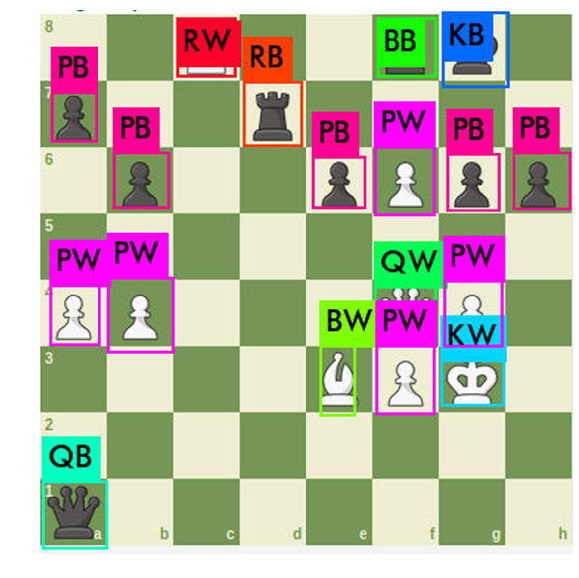

In [0]:
imShow('predictions.jpg')